In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [17]:
data = pd.read_csv('Movie_Review.csv')
data

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [18]:
data.dropna(inplace=True)

In [19]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [20]:
data['text'] = data['text'].apply(clean_review)

In [10]:
#wordcloud 

from wordcloud import WordCloud

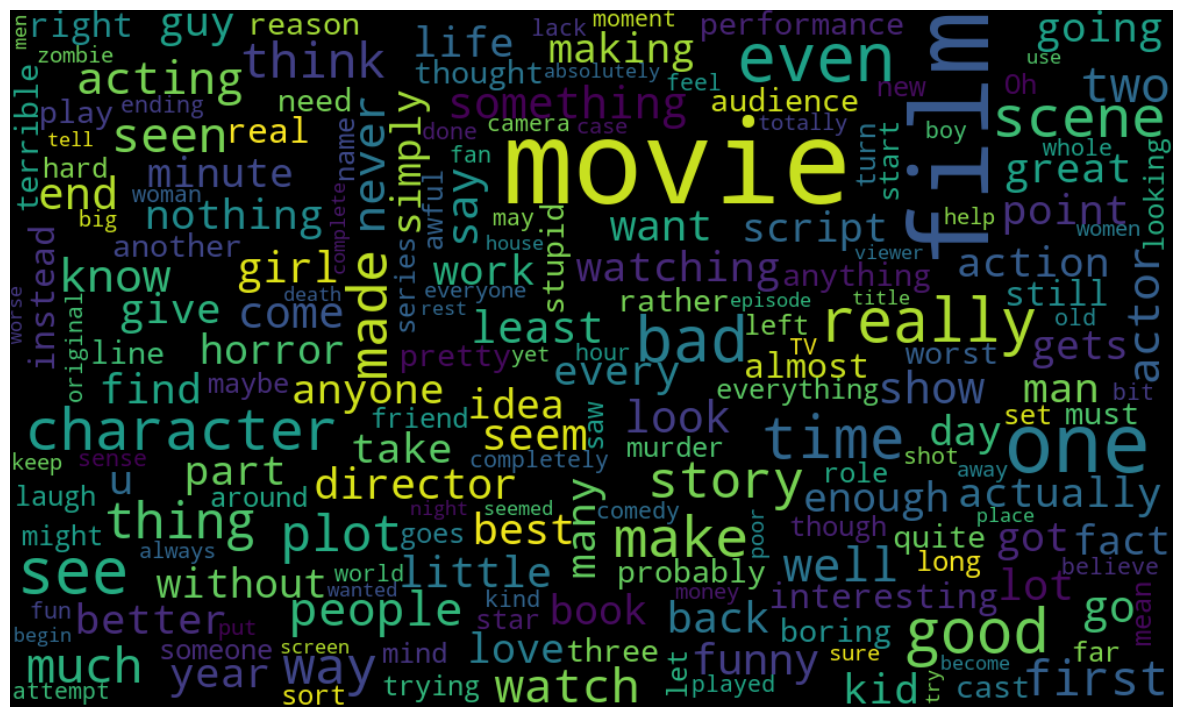

In [25]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

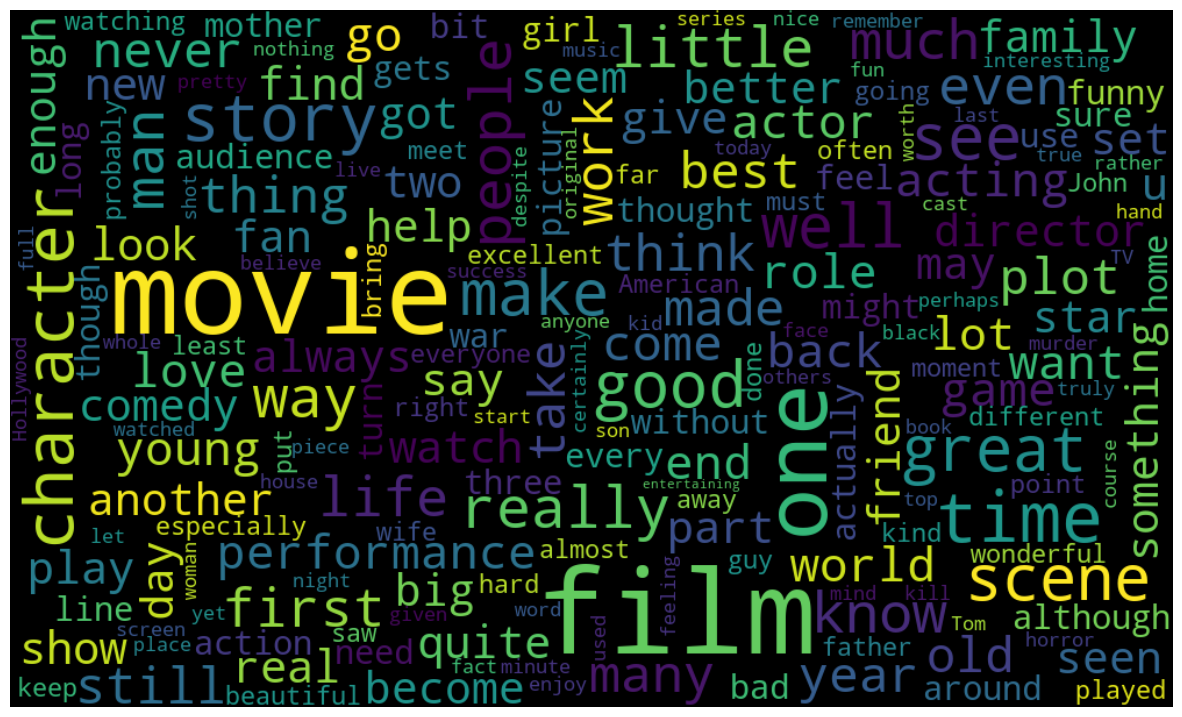

In [26]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'positive'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [28]:
reviews = cv.fit_transform(data['text']).toarray()

In [24]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [29]:
data['sentiment'].value_counts()

negative    263
positive    237
Name: sentiment, dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [34]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [35]:
predict = model.predict(reviews_test)

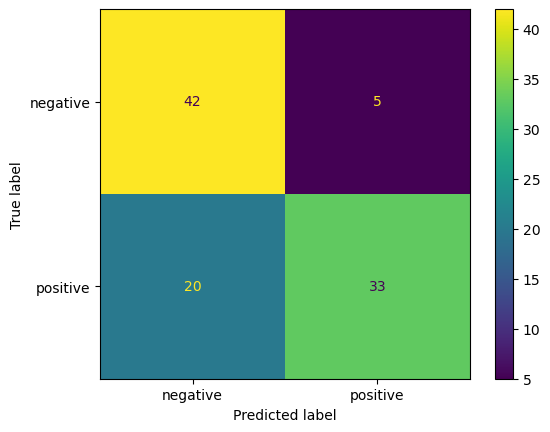

In [36]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [37]:
import pickle as pk

In [38]:
pk.dump(model,open('model.pkl','wb'))

In [39]:
pk.dump(cv,open('scaler.pkl','wb'))